# Analysis of Horse Race Probability Game

### Game Explaination
This game consists of 11 columns, representing numbers [2, 12], each with a specific number of pegging holes. The game is played by rolling a pair of dice and moving the corresponding horse one peg forward. The winner is the horse which crosses the finish line first. The number of holes in each column are (column, holes) [(2, 3), (3, 6), (4, 8), (5, 11), (6, 14), (7, 17), (8, 14), (9, 11), (10, 8), (11, 6), (12, 3)]

### Variation
These is a variant of the game where before the game begins, n (0, 11] numbers are rolled, and those numbers are eliminated from contention.

In [87]:
import numpy as np
import random
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
BOARD = [3, 6, 8, 11, 14, 17, 14, 11, 8, 6, 3]
NUM_ELIM = 0

## Game Setup

In [ ]:
def game(board, num_elim):
    # Defines game play for horse game
    # Returns winner, dictionary of roll counts, and eliminated numbers
    # PARAMS:
    #   board: number of pegging holes for each column
    #   n: number of columns to be eliminated before rolling begins
    
    if (num_elim < 0 or num_elim > 10):
        raise ValueError("Invalid value for num_elim")
    
    def check_winner(rolls, board, elim):
        for i, value in enumerate(rolls):
            if (value >= board[i] and (i + 2) not in elim):
                return i + 2
        return 0
    
    elim = set() #initialize with false value to avoid empty set
    while len(elim) < num_elim:
        temp = random.randint(1, 6) + random.randint(1, 6)
        if temp not in elim:
            elim.add(temp)

    rolls = np.zeros(11)
    winner = 0
    while (winner == 0):
        roll = random.randint(1, 6) + random.randint(1, 6)
        rolls[roll - 2] += 1
        winner = check_winner(rolls, board, elim)
    
    return winner, rolls, elim

## Analysis of Dice Rolls

In this section I will test the distribution of dice rolls from the random.randint function to ensure balanced distribution for one and two dice

In [52]:
N = 1000000
one_die = np.zeros(7)
two_dice = np.zeros(13)

for i in range(N):
    d1 = random.randint(1, 6)
    d2 = random.randint(1, 6)
    one_die[d1] += 1
    two_dice[d1 + d2] += 1

<Axes: >

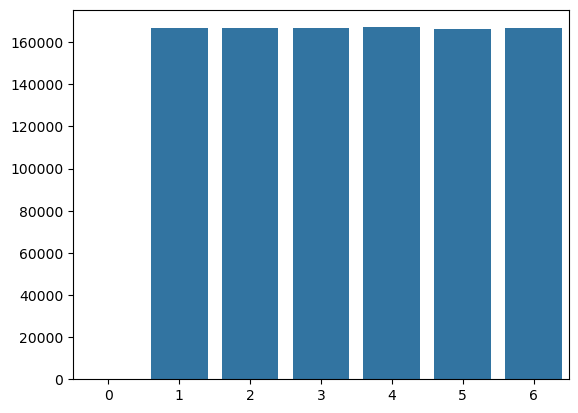

In [53]:
sn.barplot(one_die)

<Axes: >

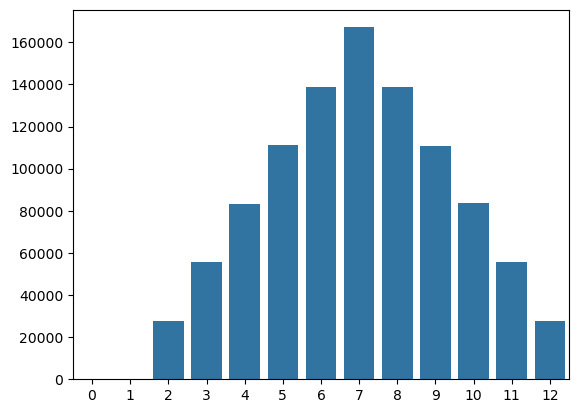

In [54]:
sn.barplot(two_dice)

Comparing realized probabilities for 2 dice compared to expected probabilities

In [56]:
exp_prob = [1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36]
real_prob = np.zeros(11)
for i, val in enumerate(two_dice):
    if (i < 2):
        continue
    real_prob[i - 2] = val / N

In [62]:
print("NUM:\tEXP_PROB\tREAL_PROB")
for i in range(11):
    print(f"{i+2}\t{round(exp_prob[i],3)}\t\t{round(real_prob[i],3)}")

NUM:	EXP_PROB	REAL_PROB
2	0.028		0.028
3	0.056		0.056
4	0.083		0.083
5	0.111		0.111
6	0.139		0.139
7	0.167		0.167
8	0.139		0.139
9	0.111		0.111
10	0.083		0.083
11	0.056		0.056
12	0.028		0.028


The dice rolls from this simulated roll match the proper distribution

## Game Simulation with 0 eliminations

In [71]:
N = 100000
BOARD = [3, 6, 8, 11, 14, 17, 14, 11, 8, 6, 3]
NUM_ELIM = 0

winner_sum = np.zeros(11)
rolls_sum = np.zeros(11)

for i in range(N):
    winner, rolls, elim = game(BOARD, NUM_ELIM)
    winner_sum[winner-2] += 1
    rolls_sum += rolls

<Axes: >

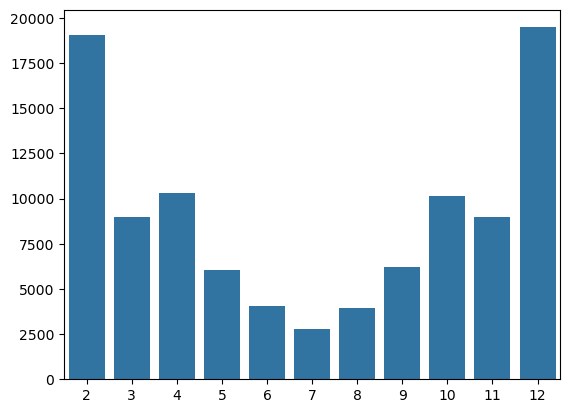

In [75]:
sn.barplot(x = range(2, 13), y = winner_sum)


## Testing different Elimination Variants

In [100]:
N = 100000

results = np.zeros((11, 3, 11))

for num_elim in range(0, 11):
    winner_sum = np.zeros(11)
    rolls_sum = np.zeros(11)
    elim_sum = np.zeros(11)

    for i in range(N):
        winner, rolls, elim = game(BOARD, num_elim)
        winner_sum[winner-2] += 1
        rolls_sum += rolls
        for val in elim:
            elim_sum[val - 2] += 1
    
    results[num_elim] = [winner_sum, rolls_sum, elim_sum]

In [99]:
results

array([[[ 19371.,   9129.,  10113.,   6068.,   3908.,   2789.,   3814.,
           6077.,  10013.,   9101.,  19617.],
        [138976., 277811., 418210., 556517., 696077., 834689., 694990.,
         557837., 417611., 278084., 139185.],
        [  2706.,   5498.,   8233.,  11088.,  14013.,  16913.,  13918.,
          11164.,   8324.,   5405.,   2738.]],

       [[ 19451.,   9206.,  10050.,   5969.,   3944.,   2770.,   3967.,
           6021.,   9964.,   9251.,  19407.],
        [138991., 278439., 416879., 556291., 694958., 834699., 696509.,
         555930., 416502., 278408., 139215.],
        [  2814.,   5456.,   8399.,  11165.,  13827.,  16800.,  13803.,
          11188.,   8284.,   5462.,   2802.]],

       [[ 19636.,   9103.,   9919.,   6005.,   3846.,   2641.,   4108.,
           5954.,   9982.,   9196.,  19610.],
        [139243., 277577., 416714., 555502., 694820., 834243., 695891.,
         553334., 415921., 278105., 139271.],
        [  2861.,   5563.,   8169.,  11175.,  13746.

Plotting results. 3 columns of plots indicate: Distribution of Winning Numbers, Distribution of Rolls, Distribution of Numbers Eliminated <br>
11 rows indicate respective number of Numbers Eliminated

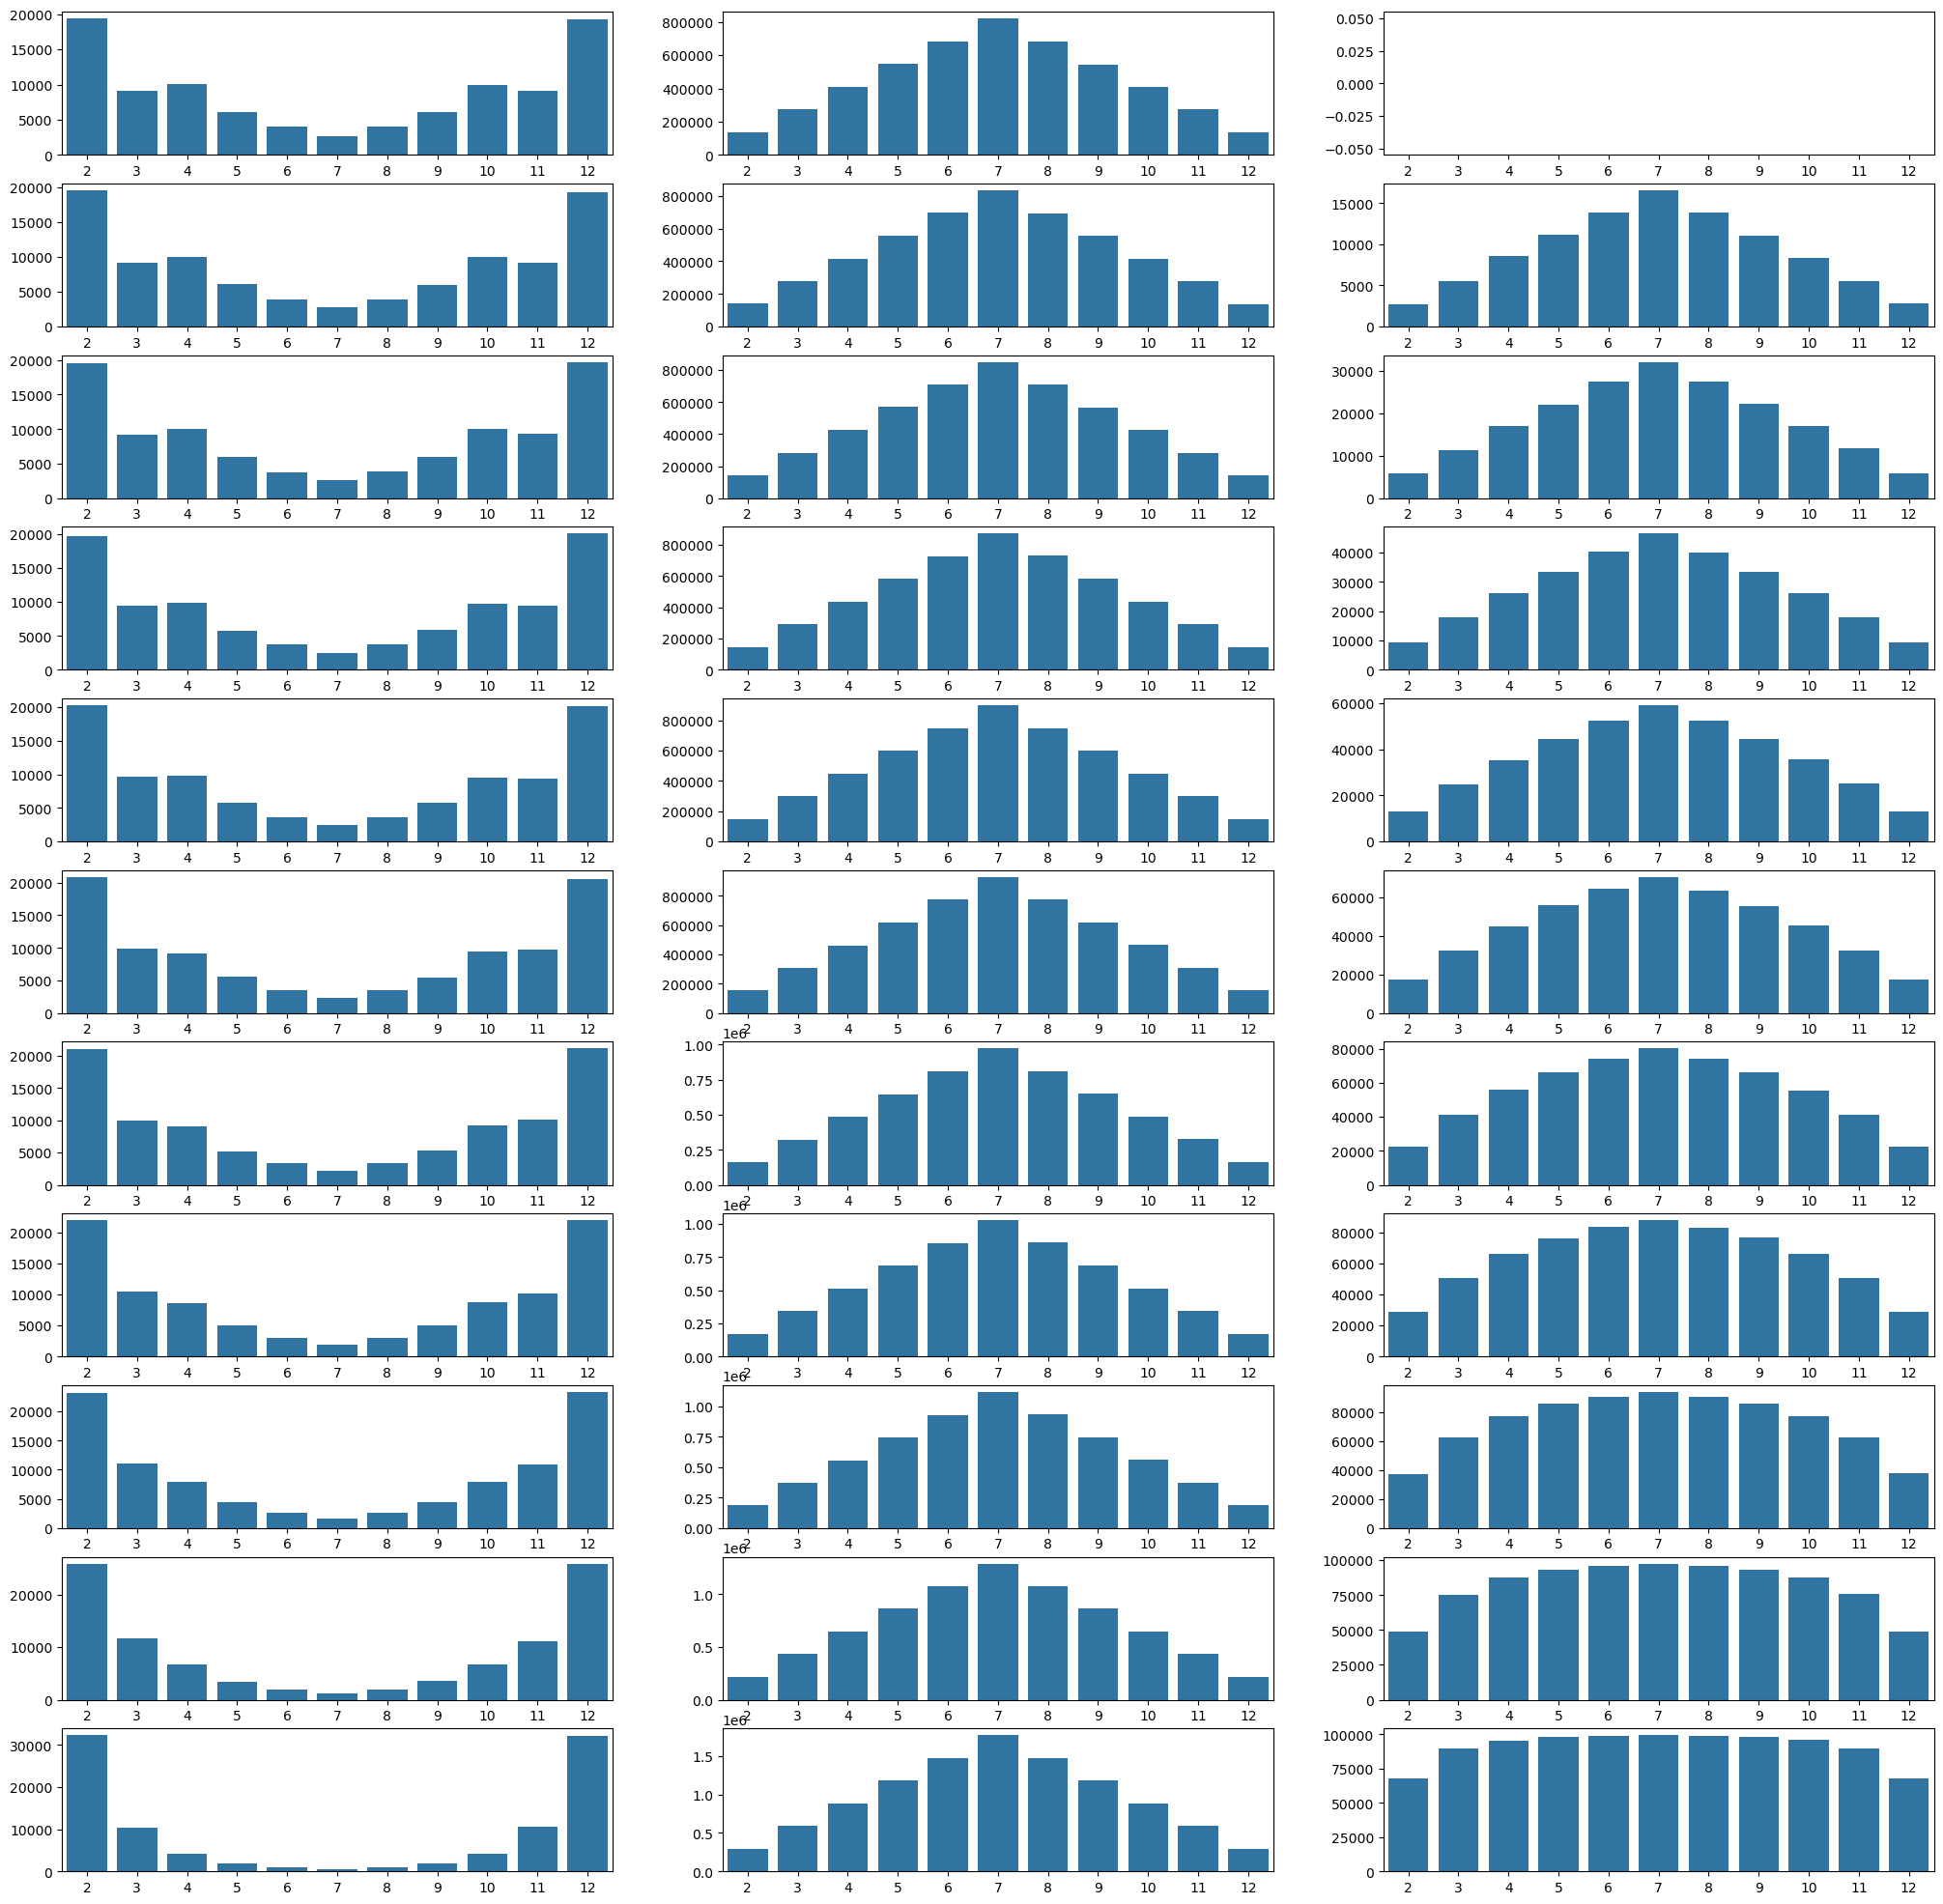

In [101]:
grid_rows, grid_cols = 11, 3

fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(25, 25))
x_axis = range(2, 13)
for i in range(grid_rows):
    for j in range(grid_cols):
        ax = axes[i, j]
        sn.barplot(x = x_axis, y = results[i, j], ax=ax)

plt.show()

## Probability Analysis

### Probability of Rolling Two Dice and Adding Numbers

The probability of rolling two dice and obtaining a specific sum is determined by the number of combinations that result in that sum divided by the total number of possible outcomes (36). The probabilities for each sum are as follows:

- **P(2)** = 1/36  
- **P(3)** = 2/36  
- **P(4)** = 3/36  
- **P(5)** = 4/36  
- **P(6)** = 5/36  
- **P(7)** = 6/36  
- **P(8)** = 5/36  
- **P(9)** = 4/36  
- **P(10)** = 3/36  
- **P(11)** = 2/36  
- **P(12)** = 1/36  

These probabilities form a symmetric distribution, with the highest probability occurring at **P(7)**.

### Probability of a value winning
The probability of a number winning is the probability that it occurs $N_i$ times, being the number of occurrences needed to win, without any other number reaching its respective value

$$P(W_2) = \sum_{a=0}^{N_3}\sum_{b=0}^{N_4}\sum_{c=0}^{N_5}\sum_{d=0}^{N_6}\sum_{e=0}^{N_7}\sum_{f=0}^{N_8}\sum_{g=0}^{N_9}\sum_{h=0}^{N_{10}}\sum_{i=0}^{N_{11}}\sum_{j=0}^{N_{12}}P(2)^{N_2}*P(3)^a*P(4)^b*P(5)^c*P(6)^d*P(7)^e*P(8)^f*P(9)^g*P(10)^h*P(11)^i*P(12)^j*(N_2-1+a+b+c+d+e+f+g+h+i+j)!$$


## Equalizing Probabilities

In [147]:
target_prob = np.full(11, 1/11)
sim_prob = np.zeros(11)
sim_board = np.full(11, 3)
NUM_ELIM = 0
N = 10000
while True:
    winner_sum = np.zeros(11)
    for i in range(N):
        winner, _, _ = game(sim_board, NUM_ELIM)
        winner_sum[winner-2] += 1
    sim_prob = winner_sum / N
    print(sim_prob)
    if (np.max(sim_prob) > 0.1):
        sim_board[np.argmax(sim_prob)] += 1
    else:
        break
print(sim_board)


[0.004  0.0231 0.0562 0.1077 0.1774 0.2654 0.1752 0.1062 0.0589 0.021
 0.0049]
[0.0045 0.0276 0.069  0.1288 0.2063 0.1267 0.2046 0.133  0.0708 0.0245
 0.0042]
[0.0033 0.0277 0.0786 0.1411 0.0931 0.1442 0.244  0.1509 0.0795 0.0317
 0.0059]
[0.0059 0.0327 0.0949 0.1723 0.1105 0.1804 0.108  0.1675 0.0846 0.0375
 0.0057]
[0.0068 0.0395 0.0989 0.1928 0.1289 0.08   0.1183 0.1919 0.098  0.0392
 0.0057]
[0.007  0.0446 0.1126 0.0752 0.1404 0.0968 0.1365 0.2133 0.1209 0.0465
 0.0062]
[0.0075 0.0498 0.125  0.0933 0.1686 0.1146 0.1578 0.0932 0.1299 0.0512
 0.0091]
[0.011  0.0566 0.1367 0.0948 0.0777 0.1351 0.179  0.1019 0.1369 0.0591
 0.0112]
[0.0118 0.0595 0.1509 0.1146 0.0852 0.1548 0.0817 0.1114 0.1577 0.0624
 0.01  ]
[0.0111 0.0701 0.1605 0.1282 0.0983 0.1693 0.1047 0.1231 0.0546 0.0674
 0.0127]
[0.0136 0.0778 0.1838 0.1326 0.1082 0.0893 0.1104 0.135  0.0644 0.0734
 0.0115]
[0.0149 0.0805 0.0709 0.1548 0.1214 0.0984 0.131  0.1585 0.074  0.0837
 0.0119]
[0.0166 0.0935 0.0738 0.178  0.1366 0.116

In [148]:
N = 100000
BOARD = [5, 8, 11, 14, 17, 20, 17, 14, 11, 8, 5]
results = np.zeros((11, 3, 11))

for num_elim in range(0, 11):
    winner_sum = np.zeros(11)
    rolls_sum = np.zeros(11)
    elim_sum = np.zeros(11)

    for i in range(N):
        winner, rolls, elim = game(BOARD, num_elim)
        winner_sum[winner-2] += 1
        rolls_sum += rolls
        for val in elim:
            elim_sum[val - 2] += 1
    
    results[num_elim] = [winner_sum, rolls_sum, elim_sum]

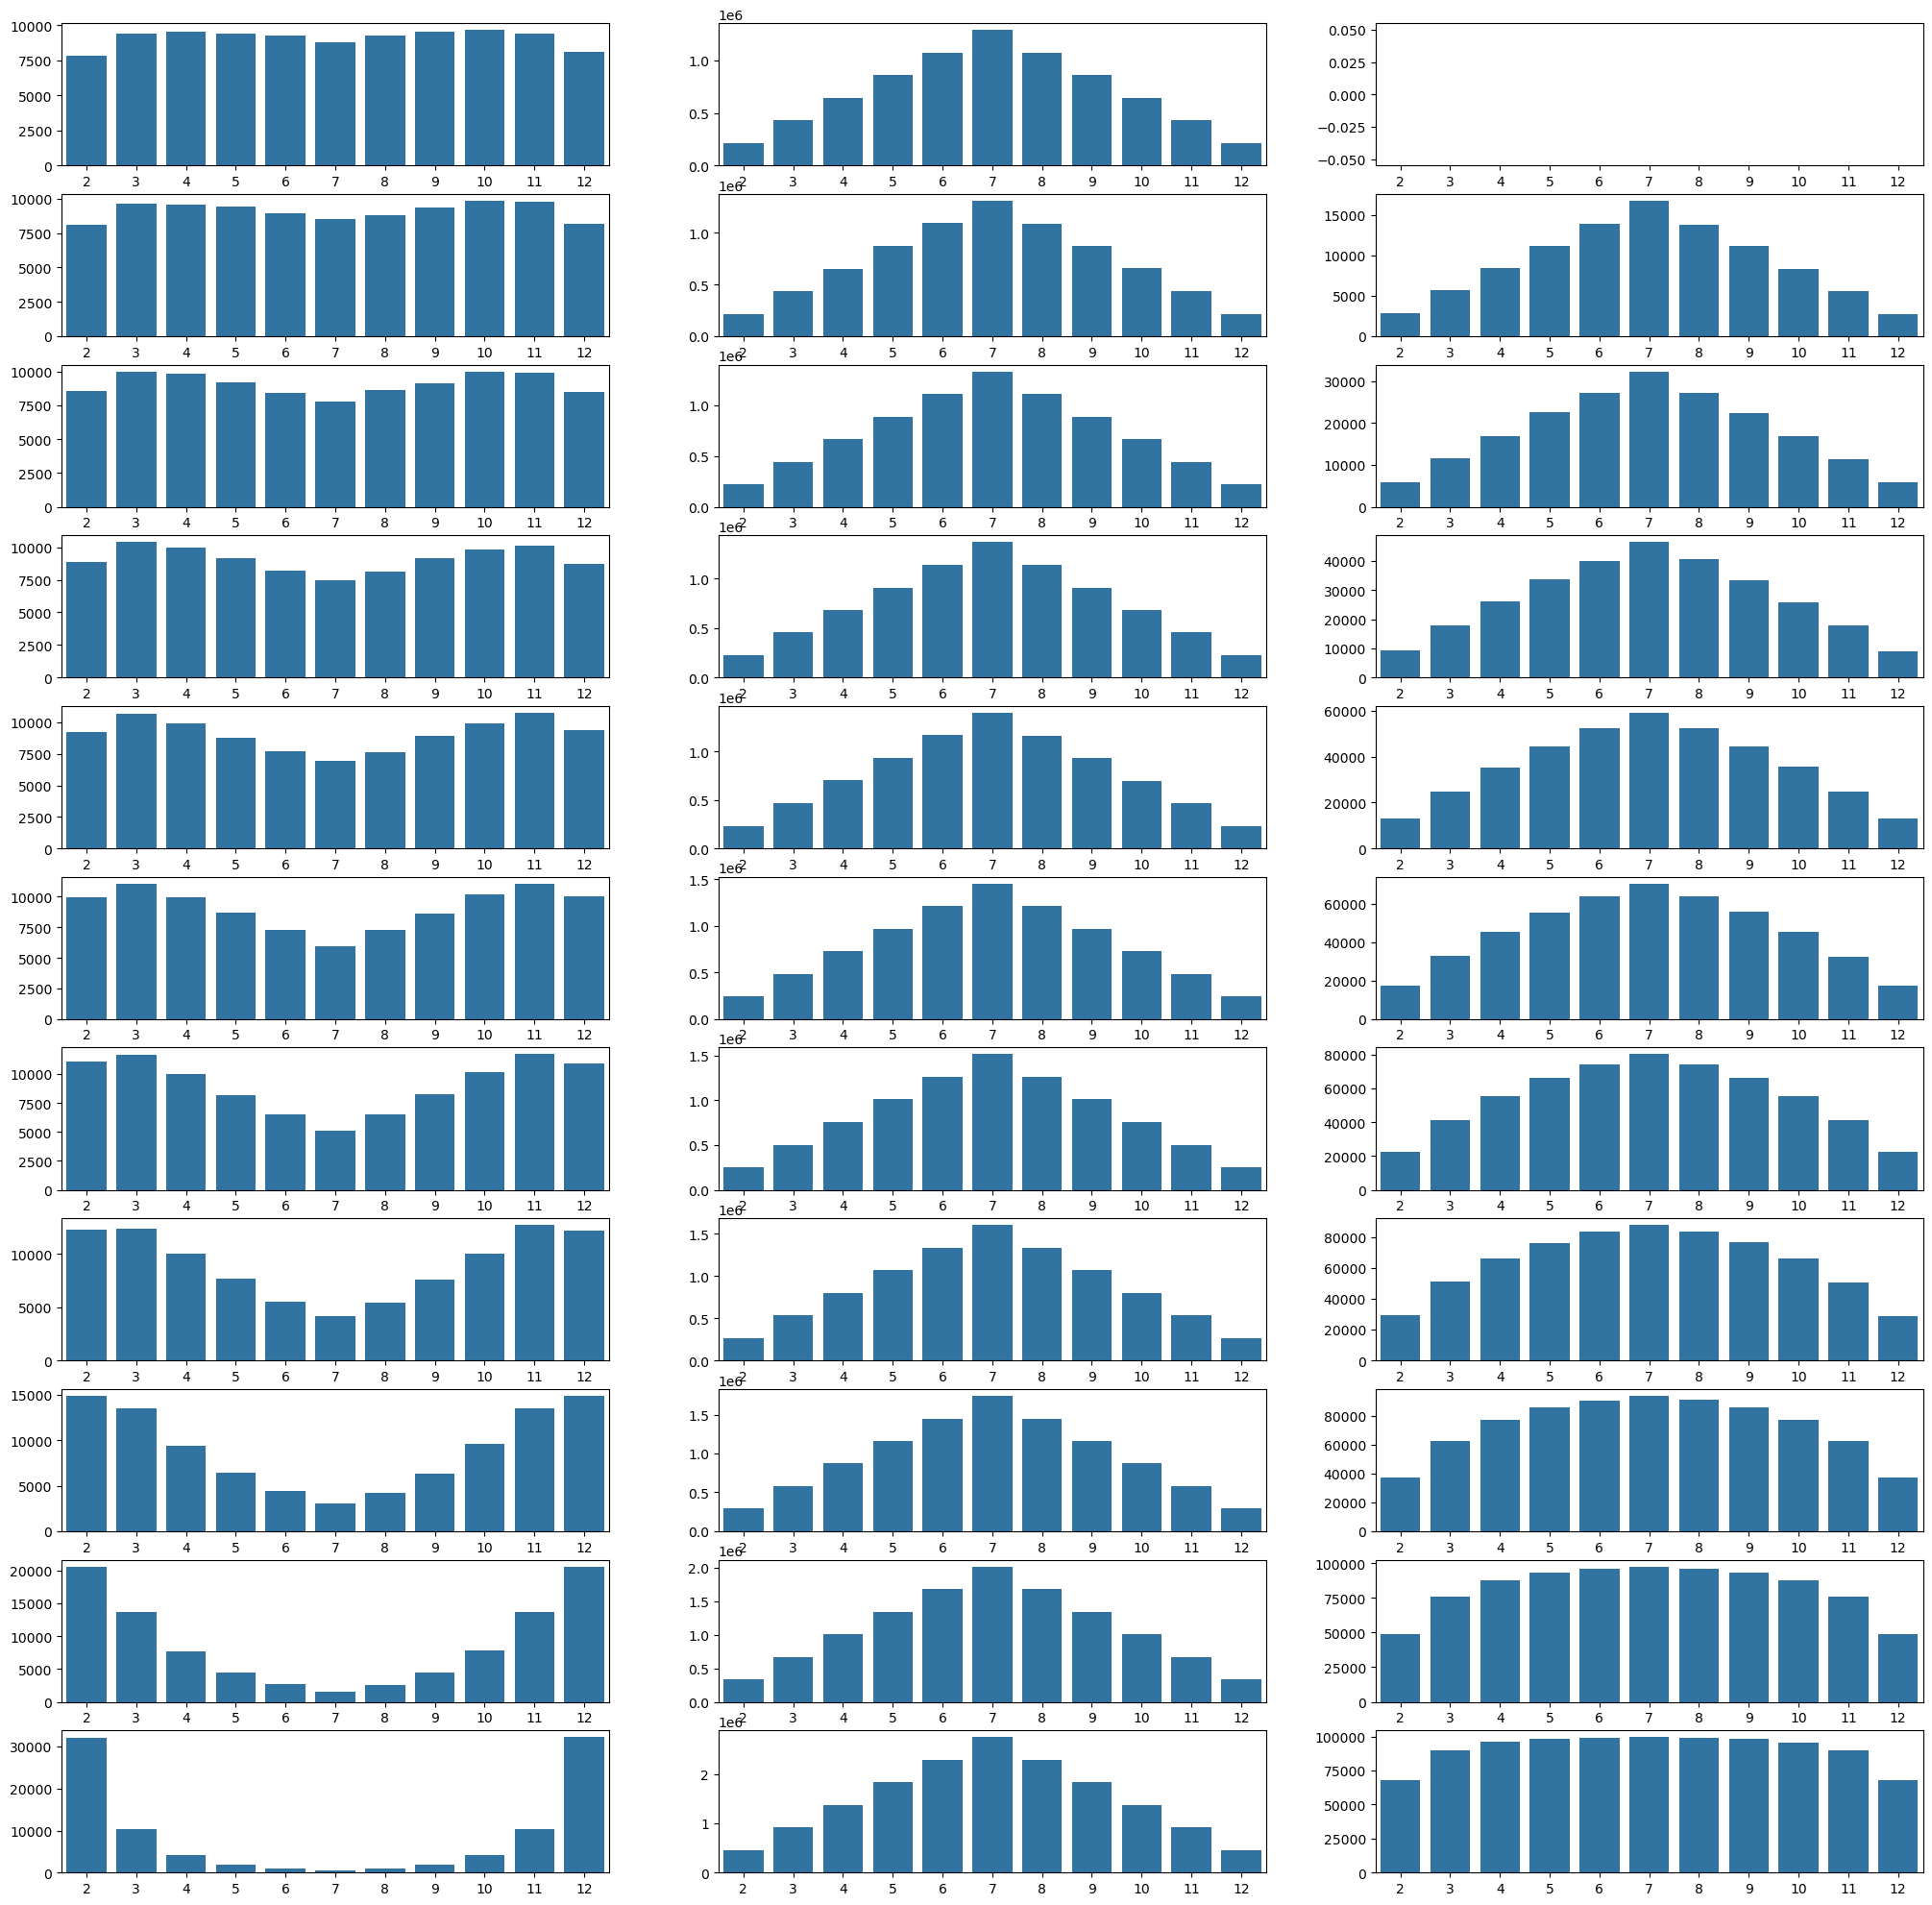

In [149]:
grid_rows, grid_cols = 11, 3

fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(25, 25))
x_axis = range(2, 13)
for i in range(grid_rows):
    for j in range(grid_cols):
        ax = axes[i, j]
        sn.barplot(x = x_axis, y = results[i, j], ax=ax)

plt.show()

In [156]:
target_prob = np.full(11, 1/11)
sim_prob = np.zeros(11)
sim_board = [ 7, 12, 17, 22, 26, 30, 26, 22, 17, 12,  7]
NUM_ELIM = 2
N = 5000
while True:
    winner_sum = np.zeros(11)
    for i in range(N):
        winner, _, _ = game(sim_board, NUM_ELIM)
        winner_sum[winner-2] += 1
    sim_prob = winner_sum / N
    print(sim_prob)
    if (np.max(sim_prob) > 0.1):
        sim_board[np.argmax(sim_prob)] += 1
    elif (np.min(sim_prob) < 0.085):
        sim_board[np.argmin(sim_prob)] -= 1
    else:
        break
print(sim_board)


[0.0928 0.092  0.089  0.0792 0.0832 0.1064 0.0896 0.0768 0.0922 0.1012
 0.0976]
[0.1012 0.1012 0.0908 0.0784 0.1008 0.076  0.0912 0.0778 0.0906 0.0984
 0.0936]
[0.048  0.1062 0.0908 0.078  0.1026 0.0822 0.1016 0.0824 0.097  0.1074
 0.1038]
[0.0474 0.108  0.1038 0.0796 0.108  0.094  0.1048 0.077  0.1012 0.0734
 0.1028]
[0.05   0.0676 0.107  0.093  0.111  0.1056 0.1112 0.09   0.0998 0.063
 0.1018]
[0.0534 0.0676 0.103  0.0898 0.1188 0.1006 0.0784 0.0922 0.11   0.069
 0.1172]
[0.0574 0.0662 0.0988 0.103  0.0932 0.1066 0.088  0.0926 0.1118 0.068
 0.1144]
[0.0578 0.0742 0.1158 0.1094 0.09   0.108  0.0902 0.1088 0.1164 0.0716
 0.0578]
[0.057  0.076  0.1272 0.1084 0.1024 0.1218 0.096  0.1004 0.0804 0.0714
 0.059 ]
[0.0558 0.0754 0.0828 0.1156 0.1032 0.1256 0.1038 0.114  0.0822 0.0782
 0.0634]
[0.0542 0.0744 0.0868 0.128  0.1014 0.1004 0.1018 0.1194 0.0896 0.0832
 0.0608]
[0.0586 0.0828 0.0874 0.086  0.1132 0.1006 0.1102 0.1226 0.0928 0.0824
 0.0634]
[0.065  0.081  0.0902 0.0874 0.12   0.1102 

In [160]:
sim_board

[22, 40, 58, 76, 93, 110, 93, 76, 58, 40, 22]

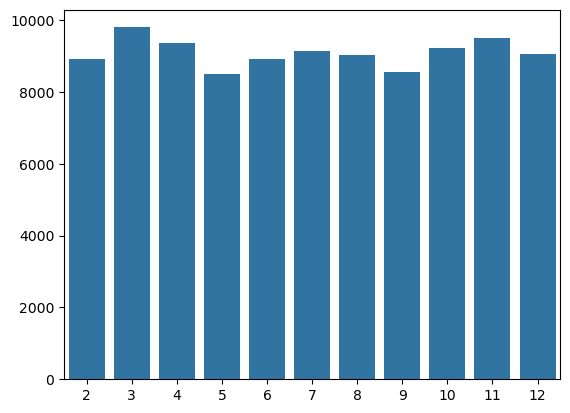

In [161]:
N = 100000
BOARD = sim_board.copy()
winner_sum = np.zeros(11)

for i in range(N):
    winner, _, _ = game(sim_board, NUM_ELIM)
    winner_sum[winner-2] += 1

sn.barplot(x = range(2, 13), y = winner_sum)
plt.show()